# MNIST Autoencoder
##### Blog Link: https://blog.keras.io/building-autoencoders-in-keras.html

##### Autoencoders main claim to fame comes from being featured in many introductory machine learning classes available online. As a result, a lot of newcomers to the field absolutely love autoencoders and can't get enough of them. This is the reason why this tutorial exists! - Keras Blog 2017

In [1]:
# imports for creating an autoencoder model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [2]:
# create the model
input_img = Input(shape=(28, 28, 1))

# create an encoder model
x = Conv2D(32, (5,5), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(64, (5,5), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# create a decoder model
x = Conv2D(64, (5,5), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (5,5), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (5,5), activation='relu', padding='same')(x)

autoencoder_model = Model(input_img, decoded)
autoencoder_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          102464    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)        0         
__________

In [3]:
# compile our auto encoder model
autoencoder_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
# import MNIST dataset
from tensorflow.keras.datasets import mnist
import numpy as np

In [5]:
# load MNIST data
data = mnist.load_data()
data = np.array(data)

In [6]:
# create train data vector
X_train = data[0][0]
X_test = data[1][0]

In [7]:
# preprocess data
X_train = X_train / 255.0
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = X_test / 255.0
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [8]:
# add noise
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

In [9]:
# create a tensorboard callback
from tensorflow.keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='/tmp/cnn_autoencoder', histogram_freq=0)

# create callbacks list
callbacks=[tensorboard]

In [10]:
# train the model
autoencoder_model.fit(X_train_noisy, X_train, 
                      epochs=100, 
                      batch_size=512, 
                      shuffle=True, 
                      validation_data=(X_test_noisy, X_test), 
                      callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 14s 231us/step - loss: 0.2526 - acc: 0.8015 - val_loss: 0.1872 - val_acc: 0.7998
Epoch 2/100
60000/60000 [==============================] - 12s 193us/step - loss: 0.1777 - acc: 0.8060 - val_loss: 0.1538 - val_acc: 0.8064
Epoch 3/100
60000/60000 [==============================] - 12s 193us/step - loss: 0.1621 - acc: 0.8076 - val_loss: 0.1477 - val_acc: 0.8071
Epoch 4/100
60000/60000 [==============================] - 11s 191us/step - loss: 0.1711 - acc: 0.8074 - val_loss: 0.1852 - val_acc: 0.8074
Epoch 5/100
60000/60000 [==============================] - 11s 192us/step - loss: 0.1572 - acc: 0.8085 - val_loss: 0.1862 - val_acc: 0.8053
Epoch 6/100
60000/60000 [==============================] - 11s 188us/step - loss: 0.1724 - acc: 0.8073 - val_loss: 0.1737 - val_acc: 0.8084
Epoch 7/100
60000/60000 [==============================] - 11s 188us/step - loss: 0.1527 - acc: 0.8089 - val_l

Epoch 59/100
60000/60000 [==============================] - 11s 188us/step - loss: 0.1494 - acc: 0.8081 - val_loss: 0.1373 - val_acc: 0.8085
Epoch 60/100
60000/60000 [==============================] - 11s 189us/step - loss: 0.1392 - acc: 0.8102 - val_loss: 0.1318 - val_acc: 0.8092
Epoch 61/100
60000/60000 [==============================] - 11s 190us/step - loss: 0.1354 - acc: 0.8106 - val_loss: 0.1311 - val_acc: 0.8095
Epoch 62/100
60000/60000 [==============================] - 11s 189us/step - loss: 0.1460 - acc: 0.8100 - val_loss: 0.1351 - val_acc: 0.8100
Epoch 63/100
60000/60000 [==============================] - 12s 192us/step - loss: 0.1328 - acc: 0.8109 - val_loss: 0.1281 - val_acc: 0.8098
Epoch 64/100
60000/60000 [==============================] - 11s 190us/step - loss: 0.1298 - acc: 0.8113 - val_loss: 0.1334 - val_acc: 0.8078
Epoch 65/100
60000/60000 [==============================] - 11s 188us/step - loss: 0.1276 - acc: 0.8114 - val_loss: 0.1318 - val_acc: 0.8081
Epoch 66/100


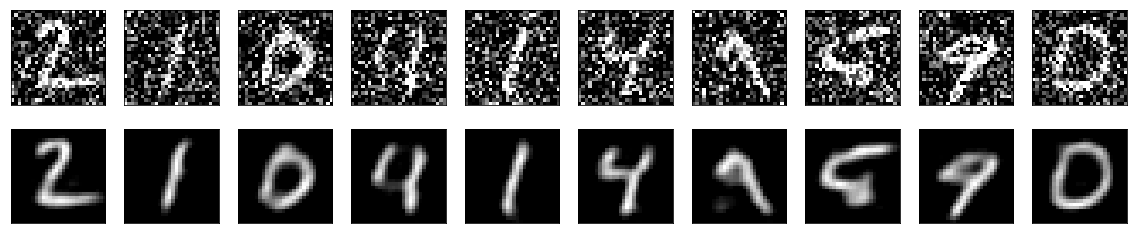

In [12]:
from matplotlib import pyplot as plt
decoded_imgs = autoencoder_model.predict(X_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()